### import libraries


In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  , confusion_matrix , classification_report

### Data Collection 

In [147]:
# loading the dataset to a pandas (DataFrame)
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [148]:
df.shape

(1599, 12)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [150]:
# statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### checking for missing values duplicates

In [151]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [152]:
columns = list(df.columns)
for i in columns :
    print(df[i].value_counts())
    print('--'*3)

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
------
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
------
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
------
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
------
chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64
------
free sulfur dioxide
6.0     138
5.0     104
1

In [153]:
print(f"Duplicates before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates after: {df.duplicated().sum()}")
df.head()

Duplicates before: 240
Duplicates after: 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### Data Analysis (Visualization)

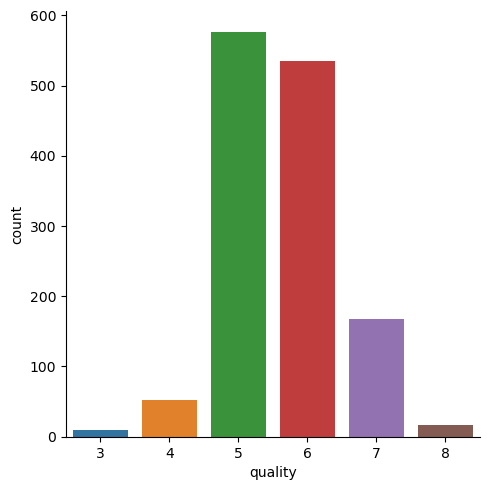

In [154]:
sns.catplot(x ='quality',data=df , kind ='count')

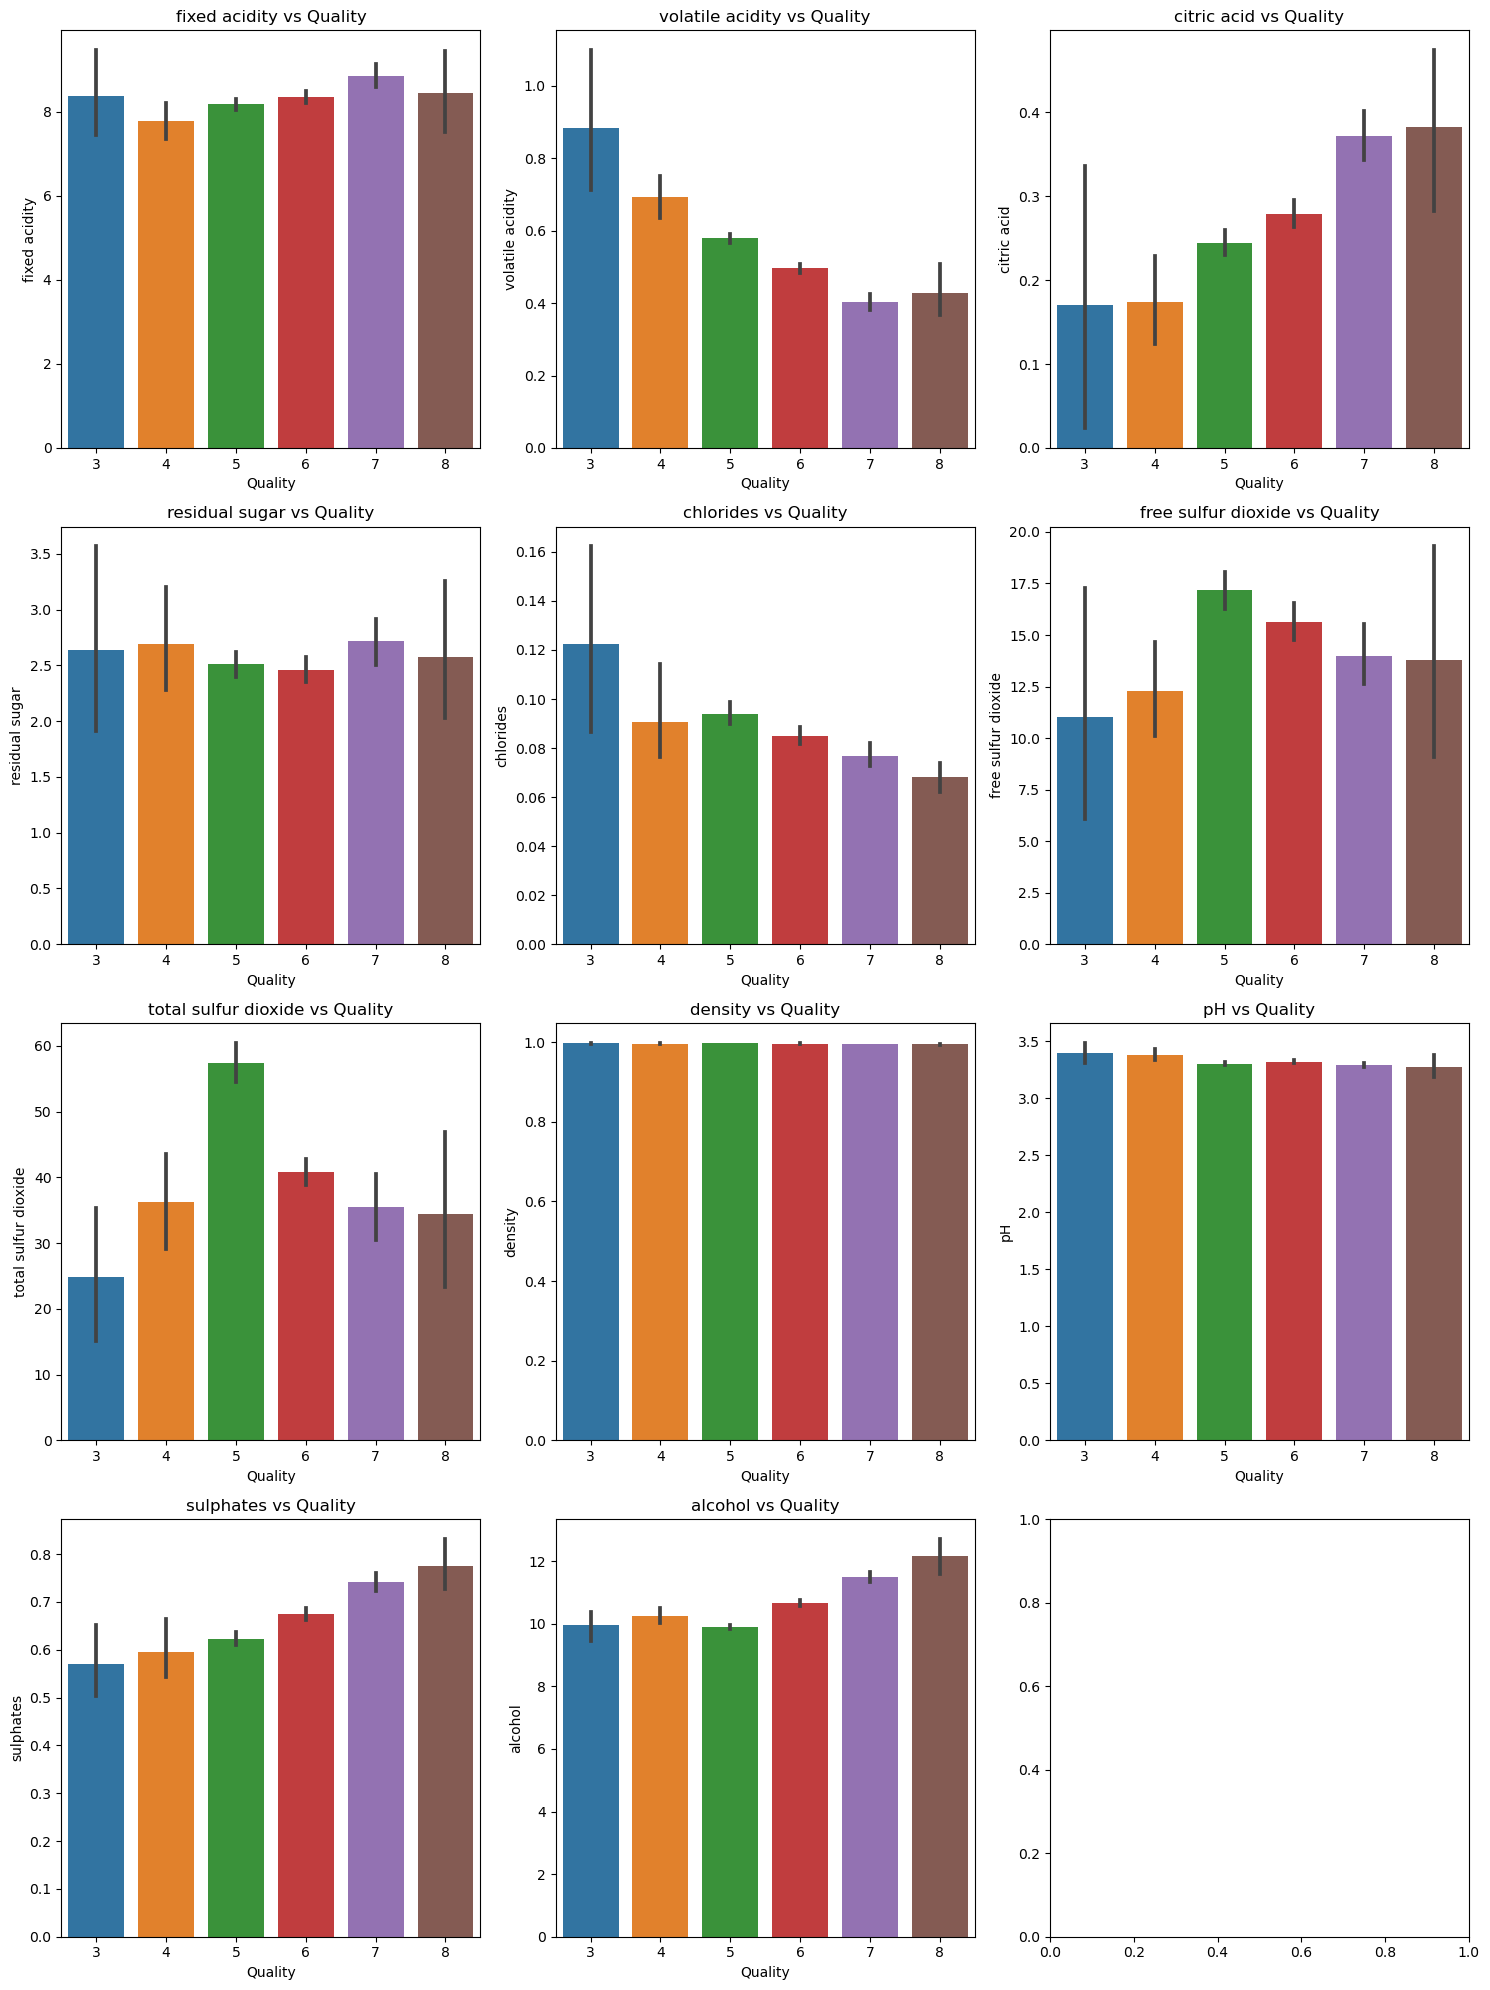

In [155]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axs = axs.flatten()

for idx, col in enumerate(columns):
    if col != 'quality':
        sns.barplot(x='quality', y=col, data=df, ax=axs[idx])
        axs[idx].set_title(f'{col} vs Quality')
        axs[idx].set_xlabel('Quality')
        axs[idx].set_ylabel(col)

plt.tight_layout()
plt.show()


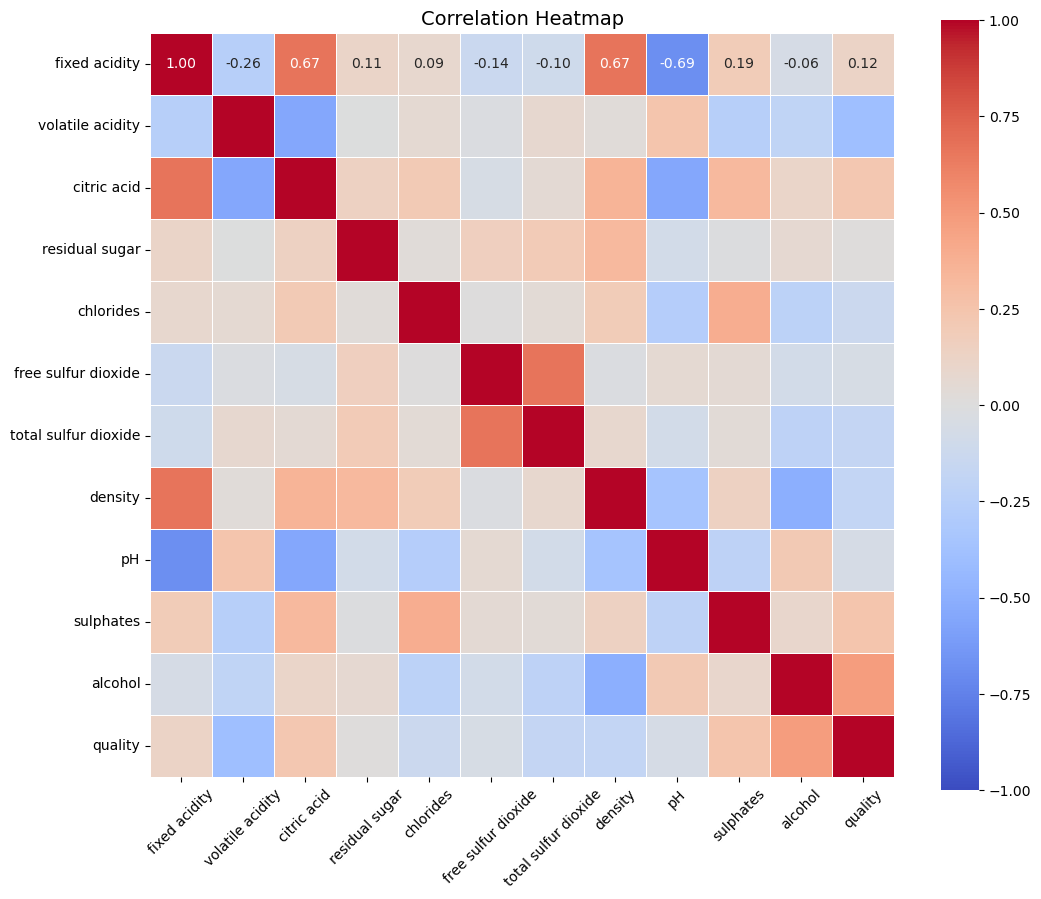

In [156]:
correlation = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    correlation,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    annot_kws={'size':10},
    cbar=True
)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


### data preprocessing 

In [157]:
X = df.drop('quality' , axis = 1)
y = df['quality']

In [158]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [159]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

### label Binarization

In [160]:
y = y.apply(lambda y_value : 1 if y_value >= 7 else 0 )

In [161]:
y.value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [163]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape )

(1019, 11) (340, 11) (1019,) (340,)


### standard scalar

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shapes: {X_train_scaled.shape}, {X_test_scaled.shape}")

Shapes: (1019, 11), (340, 11)


###  (Class Imbalance) 

In [165]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


### Model training (RandomForest classifier)

In [166]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)


model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, random_state=42)

# Evaluation of Model

In [167]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred  = model.predict(X_test_scaled)

print("--- Evaluation Metrics ---")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

--- Evaluation Metrics ---
Train Accuracy: 0.9372
Test Accuracy: 0.8324
Confusion Matrix:
[[252  42]
 [ 15  31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       294
           1       0.42      0.67      0.52        46

    accuracy                           0.83       340
   macro avg       0.68      0.77      0.71       340
weighted avg       0.87      0.83      0.85       340



### A simple example of a function that predicts wine quality based on new data:

In [168]:
def predict_quality(input_data, model, scaler):
    """
    input_data: dict or list containing new feature values in the same order as the training features
    model: trained machine learning model
    scaler: StandardScaler used during model training
    """
    import pandas as pd
    
    # If input_data is a dictionary, convert it to a list in the correct feature order
    if isinstance(input_data, dict):
        input_list = [input_data[col] for col in X.columns]
    else:
        input_list = input_data
    
    # Convert the input list to a DataFrame with the correct column names
    input_df = pd.DataFrame([input_list], columns=X.columns)
    
    # Apply scaling using the provided scaler
    input_scaled = scaler.transform(input_df)
    
    # Predict the quality class (0 or 1)
    prediction = model.predict(input_scaled)[0]
    
    # Return a clear interpretation of the prediction
    return "High Quality (>=7)" if prediction == 1 else "Low Quality (<7)"



In [169]:
# Example on a new samples 
new_sample = {
    'fixed acidity': 7.4,
    'volatile acidity': 0.7,
    'citric acid': 0,
    'residual sugar': 1.9,
    'chlorides': 0.076,
    'free sulfur dioxide': 11,
    'total sulfur dioxide': 34,
    'density': 0.9978,
    'pH': 3.51,
    'sulphates': 0.56,
    'alcohol': 9.4
}

result = predict_quality(new_sample, model, scaler)
print("Predicted Wine Quality:", result)


Predicted Wine Quality: Low Quality (<7)
